In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
os.chdir('/Users/artemysafronov/Desktop/Projects/JupyterNotebookProjects/LogisticRegression/titanic/')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data check
First, lets find if there any missing values

In [29]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

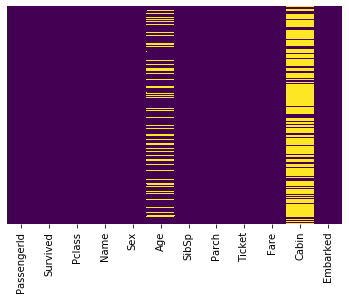

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Based on the data, Age column misses the portotion of the information. Moreover, nearly the whole Cabin column is missed

Lets check the Survived attribute since this will be the main part of our Logistic Regression model

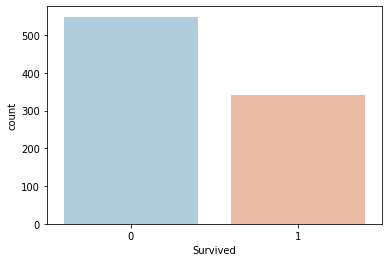

In [31]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

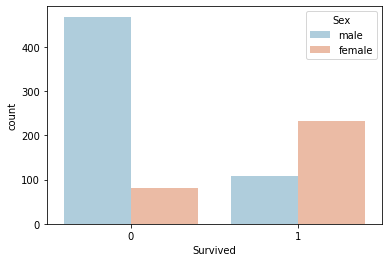

In [32]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

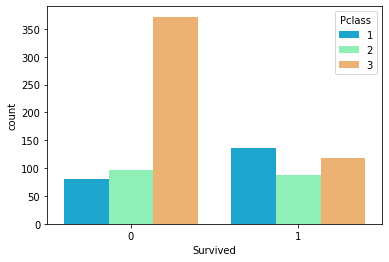

In [33]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

First of all, the amount of passengers who didnt survire after Titanic crash is bigger than survived cases. Noticable that the third class suffered more during the crash. Furthermore, the majority of Survived passengers are Female.

The following graphs show the Age distribution among passengers and Ticket price distribution

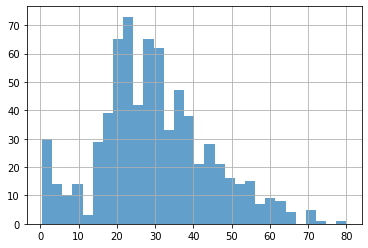

In [34]:
train['Age'].hist(bins=30,alpha=0.7)

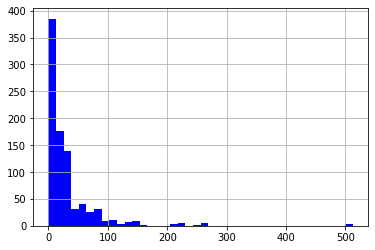

In [35]:
train['Fare'].hist(color='blue',bins=40)

# Data Cleaning

We need to substitute NA in our dataset. Lets find the average AGE for different group and then apply this data to missing values

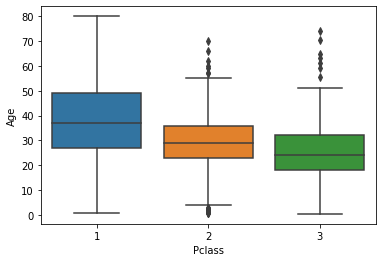

In [36]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

This functions takes the Average Age of passengers based on their Class and then applies to NA

In [39]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

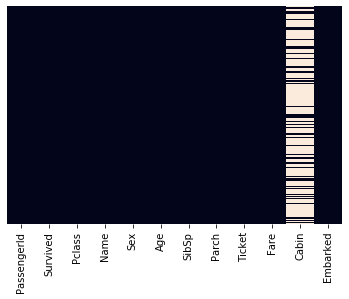

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

We will drop Cabin column there are too many NA's

In [41]:
train.drop('Cabin',axis=1,inplace=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorical Features

Now lets convert categorical feautures

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [44]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [45]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [46]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [48]:
train = pd.concat([train,sex,embark],axis=1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y=train['Survived']

In [52]:
X = train.drop('Survived',axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/artemysafronov/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       171
           1       0.64      0.69      0.67        97

    accuracy                           0.75       268
   macro avg       0.73      0.74      0.73       268
weighted avg       0.75      0.75      0.75       268



In [21]:
print(confusion_matrix(y_test,predictions))

[[134  37]
 [ 30  67]]
